# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 
Make sure that you've submitted the module 4 notebook and unlocked Module 5 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib


In [2]:
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
df=pd.read_csv('MARUTI.csv')
df=df[df['Series']=='EQ']

In [4]:
df['Return']=df['Close Price'].pct_change()

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [6]:
avg=np.sum(df['Return'].values)/len(df)
std=np.sqrt(sum([(x-avg)**2 for x in df['Return'].values])/(len(df)))

In [7]:
print('The mean daily return  is {}'.format(avg))
print('The mean daily standard deviation of returns is {}'.format(std))
print('The annualised return  is {}'.format(avg*252))
print('The annualised standard deviation is {}'.format(std*np.sqrt(252)))

The mean daily return  is 1.562200937350199e-05
The mean daily standard deviation of returns is 0.014188192606064498
The annualised return  is 0.003936746362122501
The annualised standard deviation is 0.22523057513479247


### Query5.2
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of
different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the
annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )


In [8]:
stocks=['MARUTI.csv','AXISBANK.csv','GODREJIND.csv','RAYMOND.csv','HDFCBANK.csv']
df_array=[]
for stock in stocks:
    df_array.append(pd.read_csv(stock))

In [9]:
for i in range(len(df_array)):
    print(len(df_array[i]))

496
495
494
494
609


In [10]:
def cleaning(df_array):
    for i in range(len(stocks)):
        df=df_array[i]
        df.drop(df[df['Series']!='EQ'].index,inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['Return']=df['Close Price'].pct_change()
        df.dropna(inplace=True)
        df.reset_index(drop=True,inplace=True)
        df_array[i]=df
        print(len(df_array[i]))
cleaning(df_array)

493
493
493
493
493


In [11]:
def avrg(df_array,avgs):
    for i in range(len(df_array)):
        avg=sum([x for x in df_array[i]['Return'].values])/len(df_array[i])
        avgs[0,i]=avg
def variance(df_array,avgs,vcov):
    avrg(df_array,avgs)
    for i in range(len(stocks)):
        for j in range(len(stocks)):
            v=0.0
            df1=df_array[i]
            df2=df_array[j]
            xav=avgs[0,i]
            yav=avgs[0,j]
            for k in range(len(df1)):
                x=df1.loc[k,'Return']
                y=df2.loc[k,'Return']
                v=v+(x-xav)*(y-yav)
            var=v/len(df1)
            vcov[i,j]=var

In [12]:
avgs=np.array([[0.0 for x in range(len(stocks))]])
vcov=np.array([[0.0 for i in range(len(stocks))] for j in range(len(stocks))])
variance(df_array,avgs,vcov)

In [13]:
print(avgs.shape)
print(vcov.shape)

(1, 5)
(5, 5)


In [14]:
weights=np.array([[0.2 for i in range(len(stocks))]])
ret=np.dot(weights,avgs.transpose())[0,0]
vol=np.sqrt(np.dot(weights,np.dot(vcov,weights.transpose()))[0,0])

In [15]:
print('The return of the portfolio is {}%'.format(ret*100))
print('The volatility of the portfolio is {}%'.format(vol*100))
print('The Sharpe Ratio is {}'.format(ret/vol)) 

The return of the portfolio is 0.03380843305128743%
The volatility of the portfolio is 1.0607568591396679%
The Sharpe Ratio is 0.03187199098453903


### Query 5.3 & 5.4
>Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

> Mark the 2 portfolios where - 
<li>Portfolio 1 - The Sharpe ratio is the highest
<li>Portfolio 2 - The volatility is the lowest.

In [16]:
weights_array=np.array([[[0.0 for x in range(len(stocks))]] for j in range(1000) ])

In [17]:
for i in range(len(weights_array)):
    weights=np.array([[0.0 for i in range(len(stocks))]])
    for j in range(len(stocks)):
        weights[0,j]=random.uniform(-0.3,2.5)
    weights=weights/np.sum(weights)
    weights=np.array([[round(x,2) for x in weights[0]]])
    weights_array[i]=weights

In [18]:
weights_array[0]=[[0.2,0.2,0.2,0.2,0.2]]
df=pd.DataFrame(columns=['w1','w2','w3','w4','w5','Return','Volatility'])
for i in range(len(weights_array)):
    weights=weights_array[i]
    df.loc[i,'w1']=weights[0,0]
    df.loc[i,'w2']=weights[0,1]
    df.loc[i,'w3']=weights[0,2]
    df.loc[i,'w4']=weights[0,3]
    df.loc[i,'w5']=weights[0,4]
    df.loc[i,'Return']=np.dot(weights,avgs.transpose())[0,0]
    df.loc[i,'Volatility']=np.sqrt(np.dot(weights,np.dot(vcov,weights.transpose()))[0,0])
    df.loc[i,'Sharpe Ratio']=df.loc[i,'Return']/df.loc[i,'Volatility']

In [19]:
min_vol=df[df['Volatility']==min(df['Volatility'])].index[0]
max_shr=df[df['Sharpe Ratio']==max(df['Sharpe Ratio'])].index[0]

Text(0.00920974,0.000851384,'Portfolio 2')

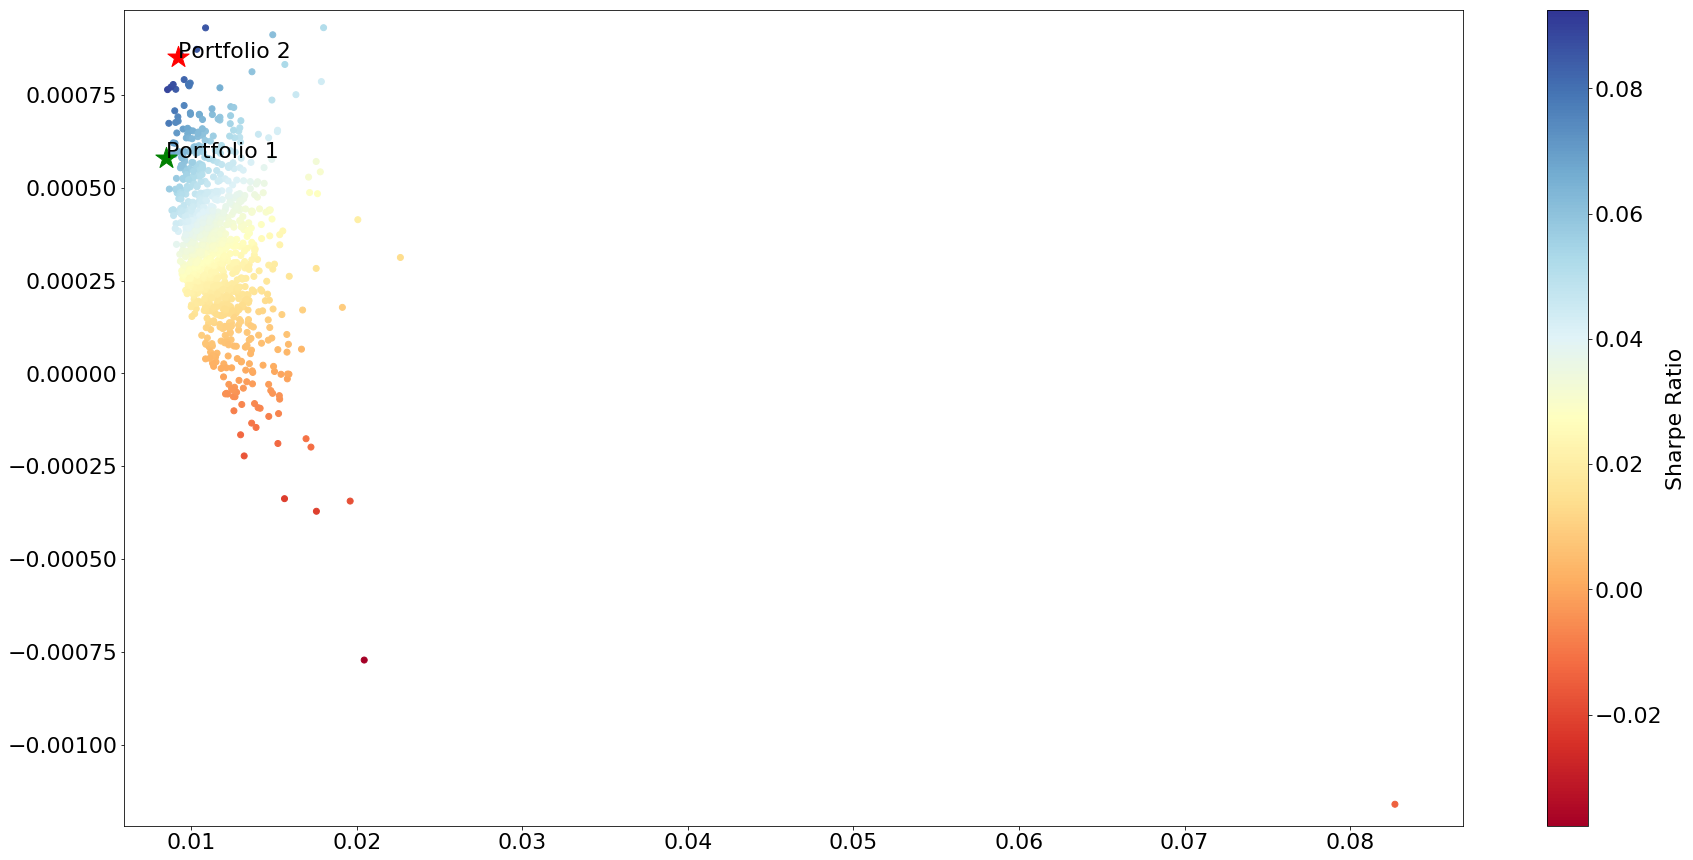

In [20]:
fig1, ax1 = plt.subplots(figsize=(30,15))
plt.xlim(0.7*min(df['Volatility']),1.05*max(df['Volatility']))
plt.ylim(1.05*min(df['Return']),1.05*max(df['Return']))
plt.scatter(df['Volatility'],df['Return'],c=df['Sharpe Ratio'],cmap='RdYlBu')
cbar=plt.colorbar()
cbar.set_label('Sharpe Ratio')
plt.scatter(df['Volatility'][min_vol],df['Return'][min_vol],marker='*',c='green',s=500)
plt.scatter(df['Volatility'][max_shr],df['Return'][max_shr],marker='*',c='red',s=500)
plt.annotate("Portfolio 1", (df['Volatility'][min_vol],df['Return'][min_vol]))
plt.annotate("Portfolio 2", (df['Volatility'][max_shr],df['Return'][max_shr]))